In [36]:
import numpy as np
import matplotlib.pyplot as plt
#from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
import copy, math
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [37]:
def zscore_normalize_features(X, rtn_ms=False):
    """
    returns z-score normalized X by column
    Args:
      X : (numpy array (m,n))
    Returns
      X_norm: (numpy array (m,n)) input normalized by column
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    if rtn_ms:
        return (X_norm, mu, sigma)
    else:
        return (X_norm)

In [38]:
# Function to calculate the cost
def compute_cost_matrix(X, y, w, b, verbose=False):
    """
    Computes the gradient for linear regression
     Args:
      X : (array_like Shape (m,n)) variable such as house size
      y : (array_like Shape (m,)) actual value
      w : (array_like Shape (n,)) parameters of the model
      b : (scalar               ) parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)
    """
    m, n = X.shape

    # calculate f_wb for all examples.
    f_wb = X @ w + b
    # calculate cost
    total_cost = (1 / (2 * m)) * np.sum((f_wb - y) ** 2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)

    return total_cost


In [39]:
#alternative to compute_gradient
def compute_gradient_matrix(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X : (array_like Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) Values of parameters of the model
      b : (scalar )                Values of parameter of the model
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.

    """
    m, n = X.shape
    f_wb = X @ w + b
    e = f_wb - y
    dj_dw = (1 / m) * (X.T @ e)
    dj_db = (1 / m) * np.sum(e)

    return dj_db, dj_dw

In [40]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X : (array_like Shape (m,n)    matrix of examples
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store values at each iteration primarily for graphing later
    hist = {}
    hist["cost"] = [];
    hist["params"] = [];
    hist["grads"] = [];
    hist["iter"] = [];

    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters / 10000)  # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w, b])
            hist["grads"].append([dj_dw, dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            # print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist  # return w,b and history for graphing

In [41]:
def run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-6):
    m, n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X, y, initial_w, initial_b,
                                              compute_cost_matrix, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")

    return (w_out, b_out)

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


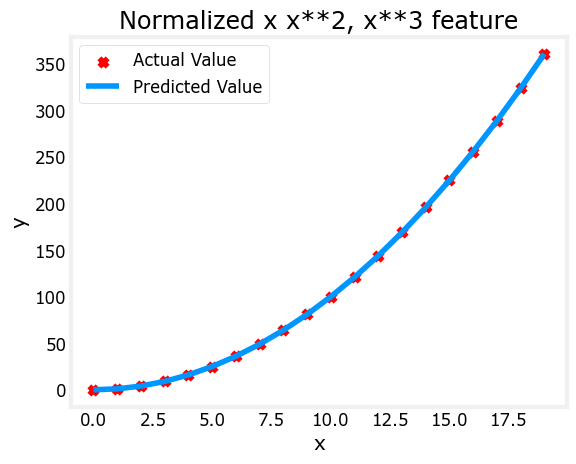

In [42]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


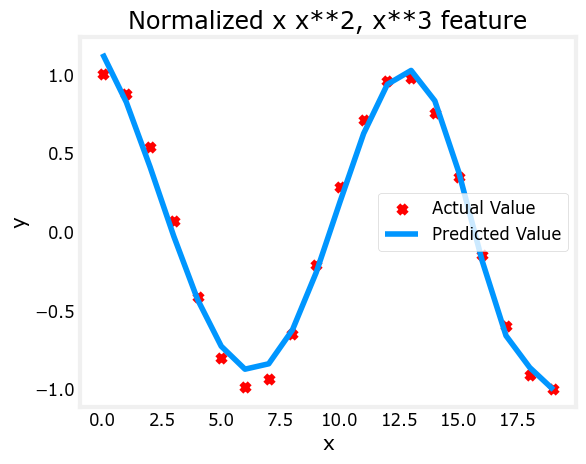

In [43]:
x = np.arange(0,20,1)
y = np.cos(x/2)
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()